# Telco Customer Churn Prediction

**1. Importing the dependencies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**2. Data Loading and Understanding**

In [3]:
df=pd.read_csv("Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

##### Sample records

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
873,5073-WXOYN,Female,0,No,No,60,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.80,3027.4,Yes
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
939,0347-UBKUZ,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,320.45,No
4876,5923-GXUOC,Male,0,No,No,10,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,1081.45,Yes
1531,7107-UBYKY,Female,0,Yes,Yes,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.75,882.55,No


In [5]:
df.shape

(7043, 21)

In [6]:
#Show all columns without hiding

pd.set_option('display.max_columns',None)  

In [7]:
#droping customerID column

#df.drop(['customerID'],axis=1)
df.drop(columns=['customerID'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#Unique values of Churn fearure
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Unique values of all columns

for col in df.columns:
    print(col,df[col].unique())
    print('-'*60)

gender ['Female' 'Male']
------------------------------------------------------------
SeniorCitizen [0 1]
------------------------------------------------------------
Partner ['Yes' 'No']
------------------------------------------------------------
Dependents ['No' 'Yes']
------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------------------------------------------------------
PhoneService ['No' 'Yes']
------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------

In [13]:
# taking categorical / object datatypes

for col in df.columns:
    if df[col].dtype=='object':
        print(col,df[col].unique())
        print('-'*60)

gender ['Female' 'Male']
------------------------------------------------------------
Partner ['Yes' 'No']
------------------------------------------------------------
Dependents ['No' 'Yes']
------------------------------------------------------------
PhoneService ['No' 'Yes']
------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
------------------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
------------------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
------------------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
------------------------------------------------------------
Streamin

In [14]:
df['gender'].dtype

dtype('O')

In [15]:
numeric_values = ['tenure','MonthlyCharges','TotalCharges'] 
for col in df.columns:
    if col not in numeric_values:
        print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
# There are empty strings in this column. To conver it into integer datatype we have to eliminate those empty spaces
#pd.to_numeric(df['TotalCharges'])

In [17]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [18]:
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
len(df[df['TotalCharges']==" "])

11

In [20]:
df['TotalCharges']=df['TotalCharges'].replace({" ":"0"})

In [21]:
df['TotalCharges'].value_counts()

TotalCharges
0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [22]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [23]:
#other way to typecast a dataframe or convert datatype
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### EDA

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical value Analysis**

##### Understand the distribution of numerical features

In [26]:
def plot_hist(df,column_name):
    plt.figure(figsize=(5,5))
    sns.histplot(df[column_name],kde=True)
    
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    #axis vertical line
    plt.axvline(col_mean,color='green',linestyle="--",label="mean") 
    plt.axvline(col_median,color='red',linestyle="-",label="median")
                

    
    plt.title(f"Distribution of {column_name}")
    plt.legend()
    plt.xlabel(column_name)
    plt.ylabel('Count')
    

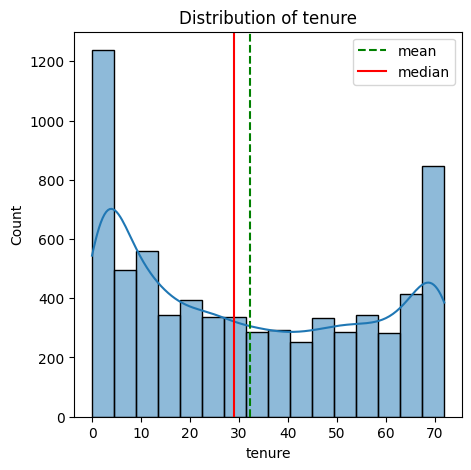

In [27]:
plot_hist(df,'tenure')

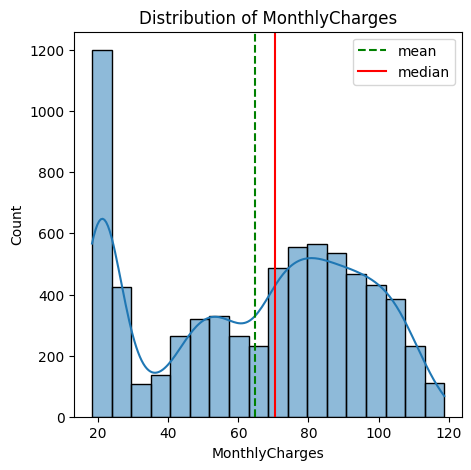

In [28]:
plot_hist(df,'MonthlyCharges')

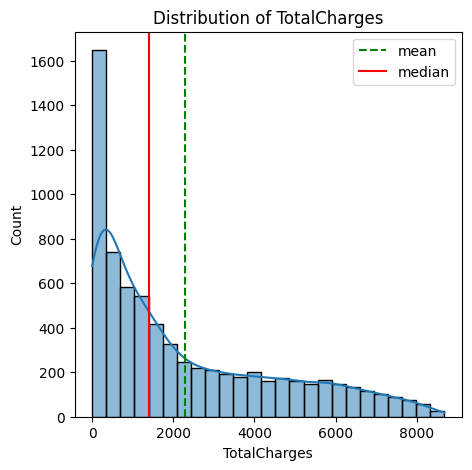

In [29]:
plot_hist(df,'TotalCharges')

**BoxPlot**

In [30]:
def plot_box(df,column_name):
    plt.figure(figsize=(4,4))
    sns.boxplot(y=df[column_name])
    plt.title(f'Box plot of {column_name}')
    plt.show()

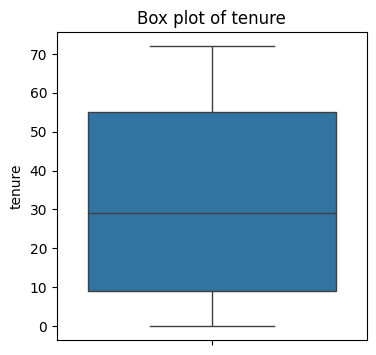

In [31]:
plot_box(df,'tenure')

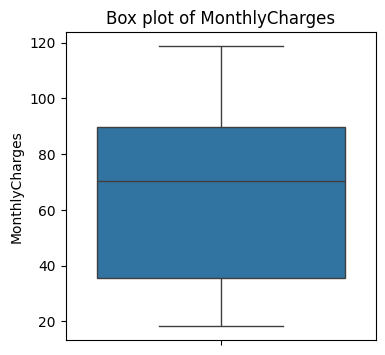

In [32]:
plot_box(df,'MonthlyCharges')

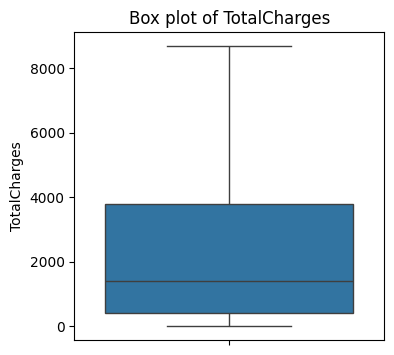

In [33]:
plot_box(df,'TotalCharges')

**Correlation Heatmap on numerical data**

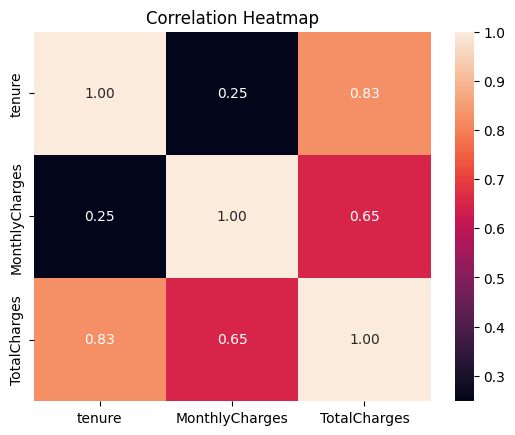

In [34]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# If any two coloumns are highly correlated then they might cause colliniarity. Droping that column may give a good accuracy, We could do that on trial and error process(look the accurace after removing and before removing)

## Categorical Feature Analysis

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5166,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,104.0,6363.45,No


In [43]:
obj_col=df.select_dtypes(include="object").columns.to_list()
#print(obj_col)
obj_col=['SeniorCitizen'] + obj_col
print(obj_col)

['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


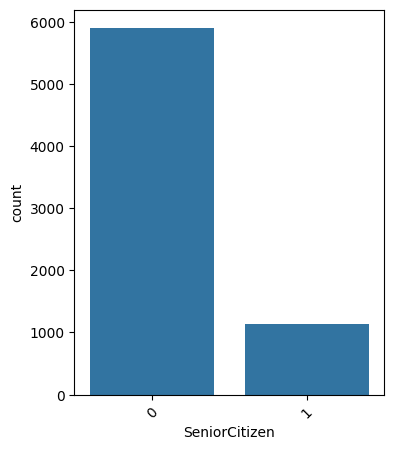

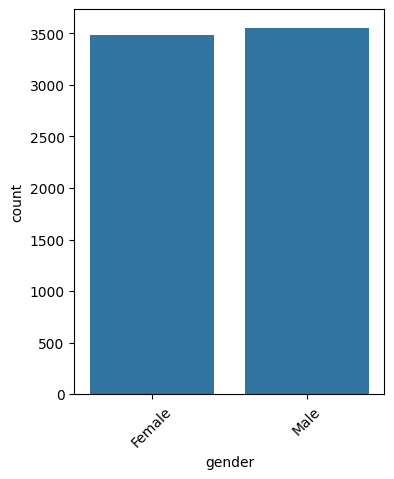

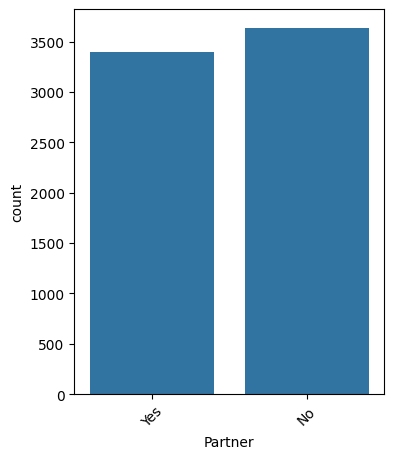

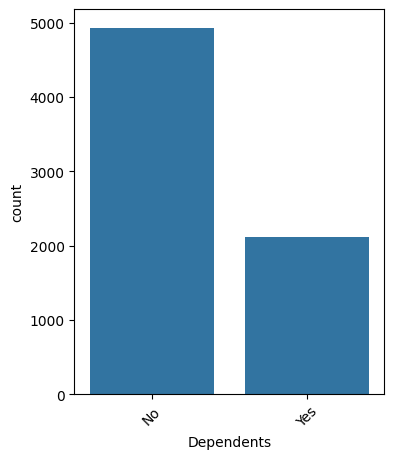

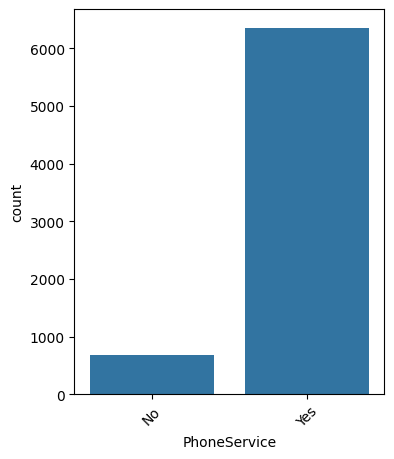

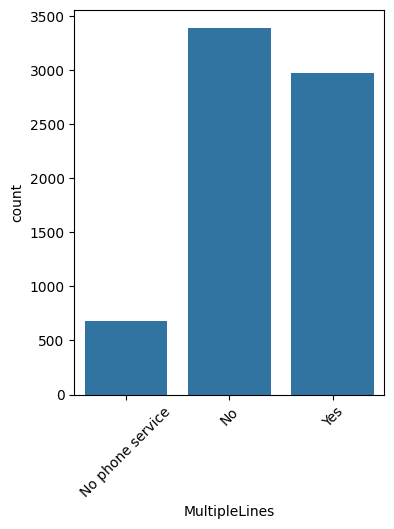

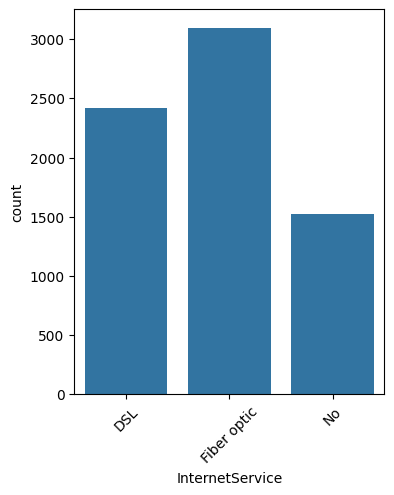

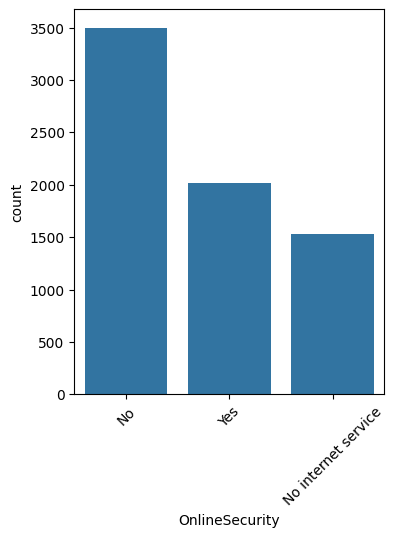

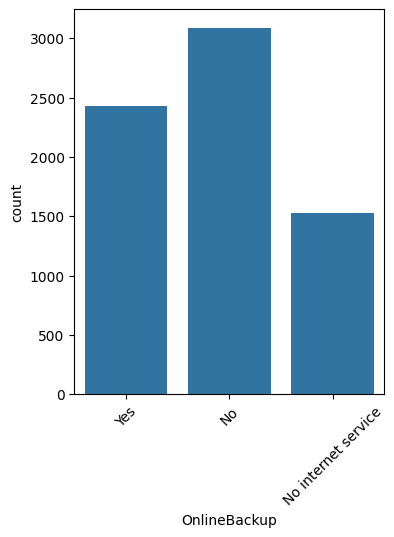

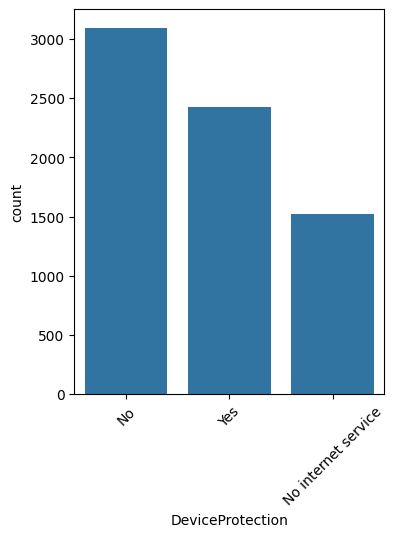

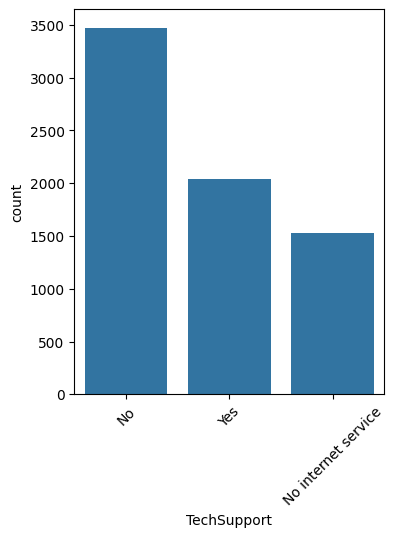

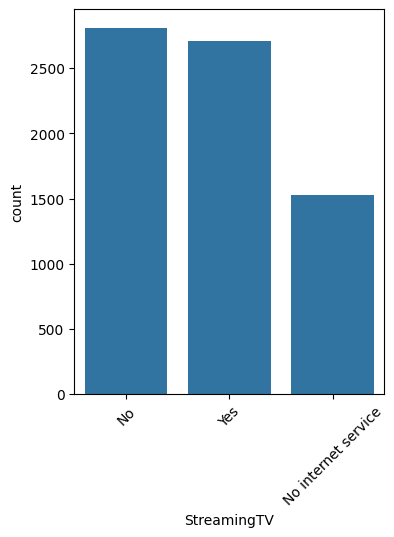

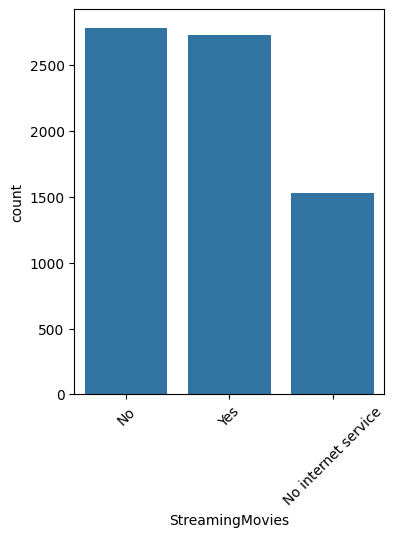

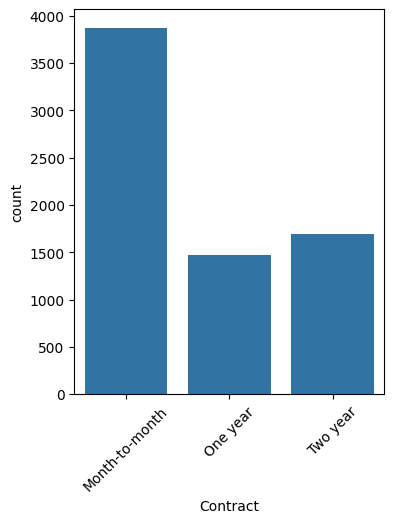

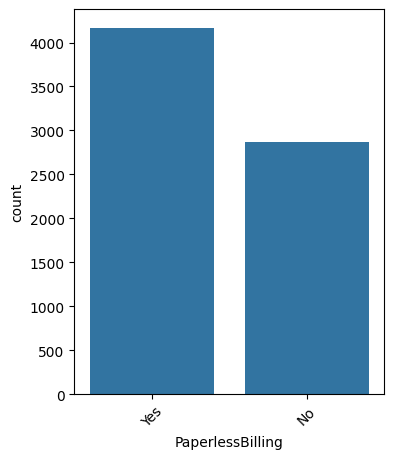

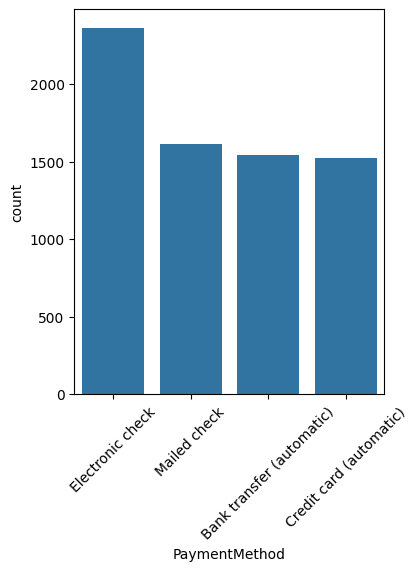

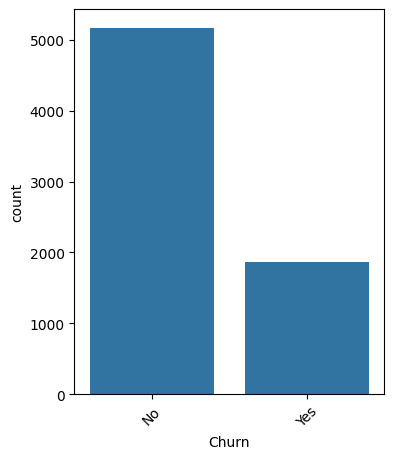

In [48]:
for col in obj_col:
    plt.figure(figsize=(4,5))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)